In [143]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

def generate_points(length, height, num_points):
    points = []
    for i in range(num_points):
        x = random.uniform(0, length)
        y = random.uniform(0, height)
        points.append((x, y))

    sns.set_style('darkgrid')
    plt.figure(figsize=(6, 4))
    ax = sns.scatterplot(x=[p[0] for p in points], y=[p[1] for p in points])
    plt.title('Scatter Plot of Generated Points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    #pairwise distances
    distances = []
    for i in range(num_points):
        row = []
        for j in range(num_points):
            dist = sqrt((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2)
            row.append(dist)
        distances.append(row)

    return points, distances


In [144]:
length = 10.0
height = 5.0
num_points = 136
#num_points = 10


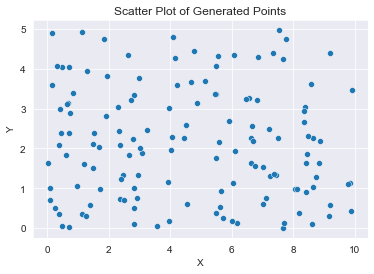

Generated Points: [(2.829847898524398, 0.5082512220696978), (7.515321952486299, 2.2525877470402094), (0.7224218770669755, 0.025115303642584408), (0.48978573864987496, 4.04201652873608), (0.8477196570264789, 3.382704585366106), (4.029951880861104, 1.952202759694404), (8.650874475539002, 2.257036763985445), (2.360584239030823, 0.7364734727584871), (8.192201963516943, 0.383632279722671), (7.527702083655007, 4.964637824134973), (2.3692220751658266, 2.0860473565380926), (0.48826546761874035, 0.058061529544153334), (3.24058139056275, 2.4659594370462323), (8.610834886831576, 0.10618133221080628), (3.9177543243259914, 1.14754742157607), (6.615089069660955, 1.6387042131037561), (5.627232150496586, 0.5298445425020493), (2.7891470330432577, 2.233506051443801), (0.7018686870759117, 2.394593184735126), (4.56167346943892, 0.5960472181433824), (4.662352386854424, 3.6736977281377667), (1.4135082772960228, 0.5722265238018559), (5.716891030746405, 0.2531650283737513), (2.4595152728178826, 1.330044685044

In [145]:
points, distances = generate_points(length, height, num_points)
print('Generated Points:', points)
print('Pairwise Distances:', distances)

In [146]:
import itertools

def find_shortest_route(points):

    num_points = len(points)
    distances = [[0] * num_points for _ in range(num_points)]
    for i in range(num_points):
        for j in range(num_points):
            dist = sqrt((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2)
            distances[i][j] = dist

    current_point = random.randint(0, num_points - 1)
    route = [current_point]

    while len(route) < num_points:
        nearest_neighbor = None
        nearest_distance = float('inf')
        for i in range(num_points):
            if i not in route and distances[current_point][i] < nearest_distance:
                nearest_neighbor = i
                nearest_distance = distances[current_point][i]

        
        route.append(nearest_neighbor)
        current_point = nearest_neighbor

    length = 0
    for i in range(num_points):
        length += distances[route[i]][route[(i + 1) % num_points]]

    return route, length


In [147]:
shortest_route, shortest_length = find_shortest_route(points)

In [148]:
from typing import List, Tuple
from math import sqrt
from random import randrange

def two_opt_algorithm(points: List[Tuple[float, float]], shortest_route: List[int], shortest_length: float, max_iterations: int=1000) -> Tuple[List[int], float]:

    point_dict = {point: i for i, point in enumerate(points)}
    indices = shortest_route.copy()

    def calculate_length(route: List[int]) -> float:
        length = 0
        for i in range(len(route) - 1):
            dist = sqrt((points[route[i]][0] - points[route[i+1]][0]) ** 2 + (points[route[i]][1] - points[route[i+1]][1]) ** 2)
            length += dist
        return length

    best_route = indices.copy()
    best_length = shortest_length
    for i in range(max_iterations):

        idx1, idx2 = sorted([randrange(len(points)) for _ in range(2)])
        new_route = indices[:idx1] + indices[idx1:idx2+1][::-1] + indices[idx2+1:]
        new_length = calculate_length(new_route)

        if new_length < best_length:
            best_route = new_route.copy()
            best_length = new_length

        indices = best_route.copy()

    optimized_route = [list(point_dict.keys())[list(point_dict.values()).index(idx)] for idx in best_route]
    optimized_route = [points.index(point) + 1 for point in optimized_route]

    return optimized_route, best_length


In [149]:
optimized_route, optimized_length = two_opt_algorithm(points, shortest_route, shortest_length)


In [150]:
shortest_length - optimized_length

3.5436660749095665